In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [19]:
# Load supplier data
csv_file_path = 'Merged_Tesla_Data_Filtered.csv'
supplier_data = pd.read_csv(csv_file_path)

# Load image
image_path = 'ModelS.png'
img = mpimg.imread(image_path)

In [20]:
# Filter data to include only Tesla Model S
filtered_data = supplier_data[supplier_data['Model'].str.contains("Model S", case=False, na=False)]

# Select unique combinations of 'Component category' and 'Supplier'
unique_components = filtered_data.drop_duplicates(subset=['Component category', 'Supplier'])

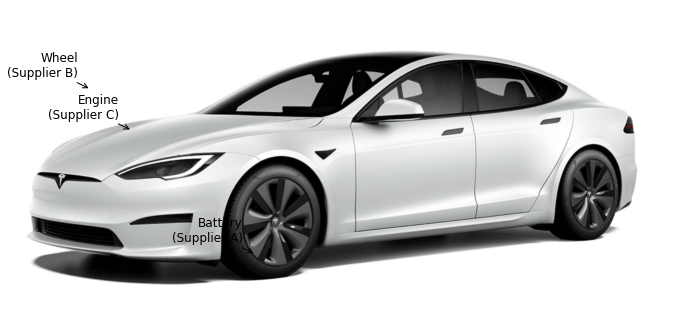

In [23]:
# Placeholder coordinates and labels for demonstration
# Replace these with accurate coordinates and labels based on the image
arrow_coordinates = [
    {"x": 600, "y": 600, "text": "Battery", "supplier": "Supplier A"},
    {"x": 200, "y": 200, "text": "Wheel", "supplier": "Supplier B"},
    {"x": 300, "y": 300, "text": "Engine", "supplier": "Supplier C"}
]

# Create a new plot for the image
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
ax.axis('off')  # Turn off axis numbers and ticks

# Add arrows and labels
for coord in arrow_coordinates:
    ax.annotate(
        f"{coord['text']}\n({coord['supplier']})",
        xy=(coord["x"], coord["y"]),
        xytext=(coord["x"] - 30, coord["y"] - 30),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=12,
        ha='right'
    )

# Save the labeled image
labeled_img_path = 'Tesla_Model_S_Labeled.png'
plt.savefig(labeled_img_path)



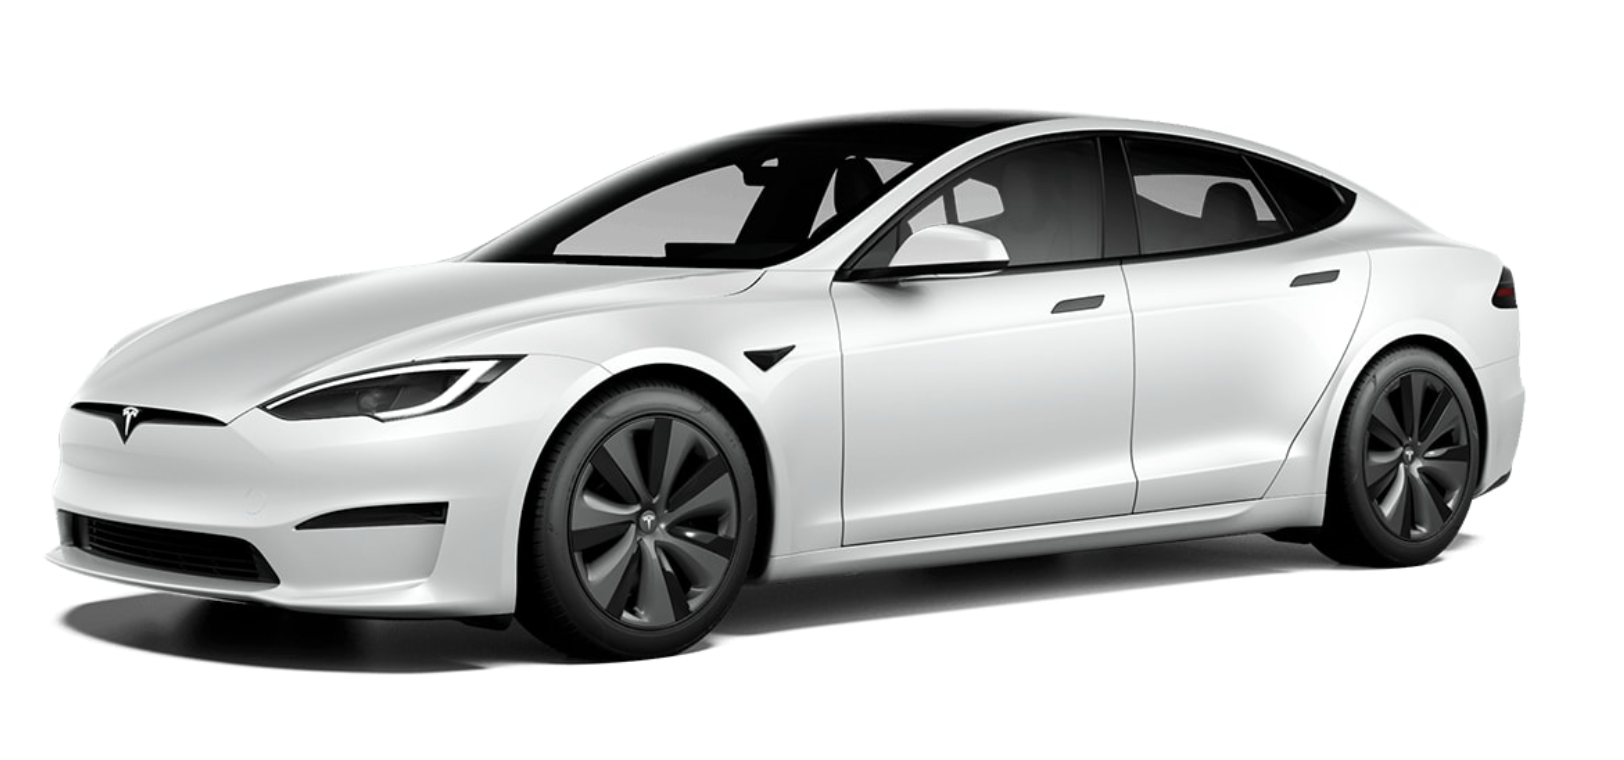

In [16]:
# Initialize a Plotly figure
fig = go.Figure()

# Add the background image
fig.add_layout_image(
    dict(
        x=0,
        sizex=img_width,
        y=img_height,
        sizey=img_height,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        source=img
    )
)

# Define coordinates for arrows and labels (replace these with accurate coordinates)
arrow_coordinates = [
    {"x": 100, "y": 100, "text": "Battery", "supplier": "Supplier A"},
    {"x": 200, "y": 200, "text": "Wheel", "supplier": "Supplier B"},
    # Add more coordinates here
]

# Add arrows and labels
for coord in arrow_coordinates:
    fig.add_annotation(
        x=coord["x"],
        y=coord["y"],
        axref="x",
        ayref="y",
        ax=coord["x"] - 30,
        ay=coord["y"] - 30,
        xanchor="left",
        yanchor="bottom",
        text=f"{coord['text']}<br>({coord['supplier']})",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#000000"
        ),
    )

# Update axes to match the image dimensions
fig.update_xaxes(range=[0, img_width], visible=False)
fig.update_yaxes(range=[0, img_height], visible=False, scaleanchor="x")

# Hide the axis
fig.update_layout(showlegend=False)

In [17]:
# Export the interactive image to an HTML file
html_file_path = 'Tesla_Model_S_Suppliers_Interactive_Plotly.html'
fig.write_html(html_file_path)